# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#imports data set
df = pd.read_csv('/content/drive/MyDrive/UT/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. It has 1898 rows.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# shows rows and columes
df.shape

(1898, 9)

In [ ]:
# also Shows rows and Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# use info() to print a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: Integer, Strings and Floats


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# displays info of data frame, all columns showing non-null
df.info() # this .info not able to reconize Not given values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# displays data frame and shows Not given in rating column
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
# allthough not given is interpert as null we should convert it to a acual NaN for better performance
df.loc[df['rating'] == "Not given", 'rating'] = np.nan
df.info() # we can now see there is better performance with change to NaN values as the ratings column can now measure NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# assigns variable and checks for missing values
missing_values = df.isna().sum()
missing_values

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [ ]:
# shows Nan now instead of Noyt given
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observation: The df shows there is Not given data, which there were 736 Not given. I updated it show Nan instean of Not given.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# describes statistatical summary of the food prep time column
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:The min is 20, average 27, max is 35


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# counts the number of ratings reponses and non responses for each row/ratings level
df['rating'].isna().sum()

736

# Observations:There are 736 not rated ratings non responses


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

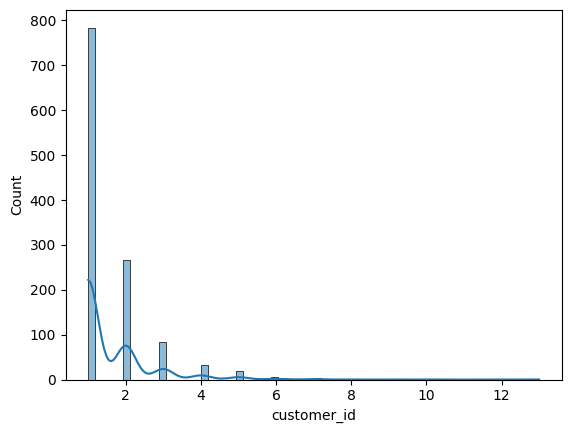

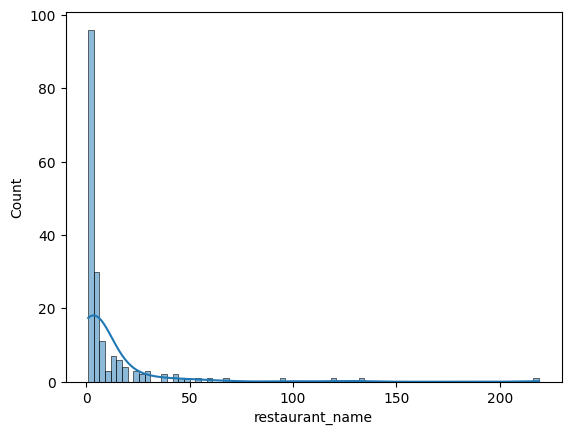

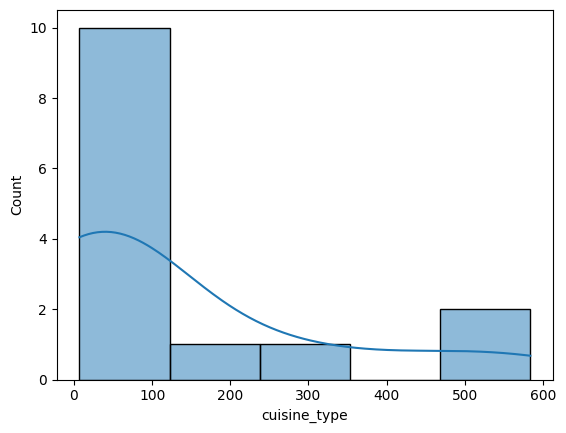

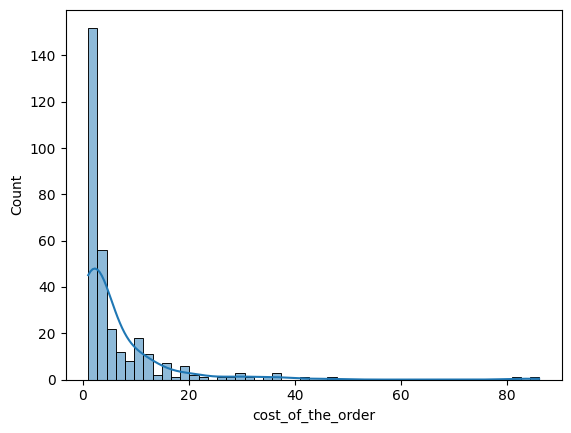

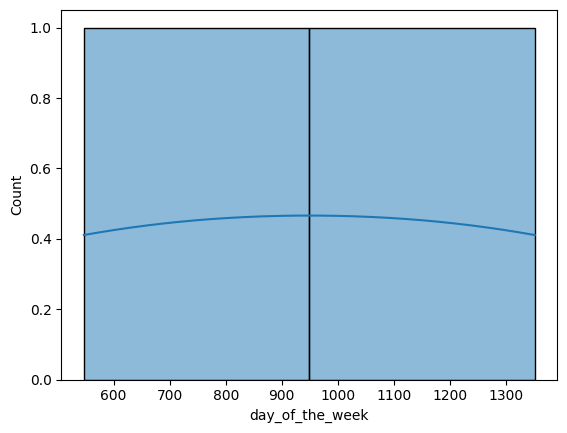

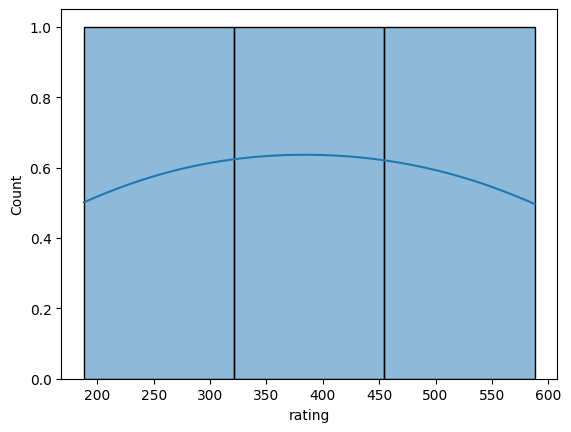

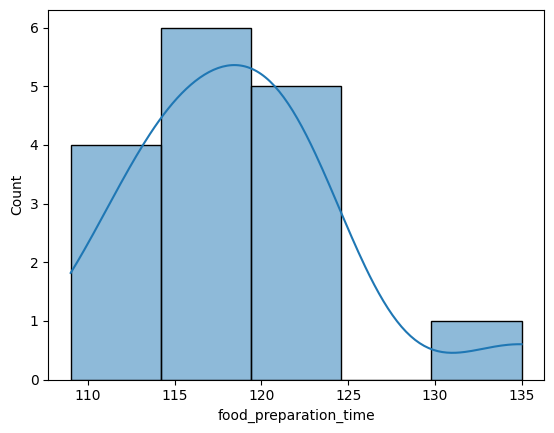

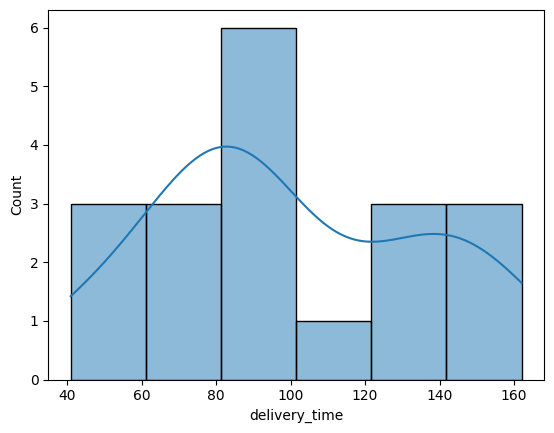

In [ ]:
# creates histogram on univariate of all columns, Iterate through the columns of the DataFrame, skips first column,# Create a histogram for the current column
for index, col in enumerate(df):
  if index > 0:
    sns.histplot(data=df, x=df[col].value_counts(),kde =True)
    plt.show()

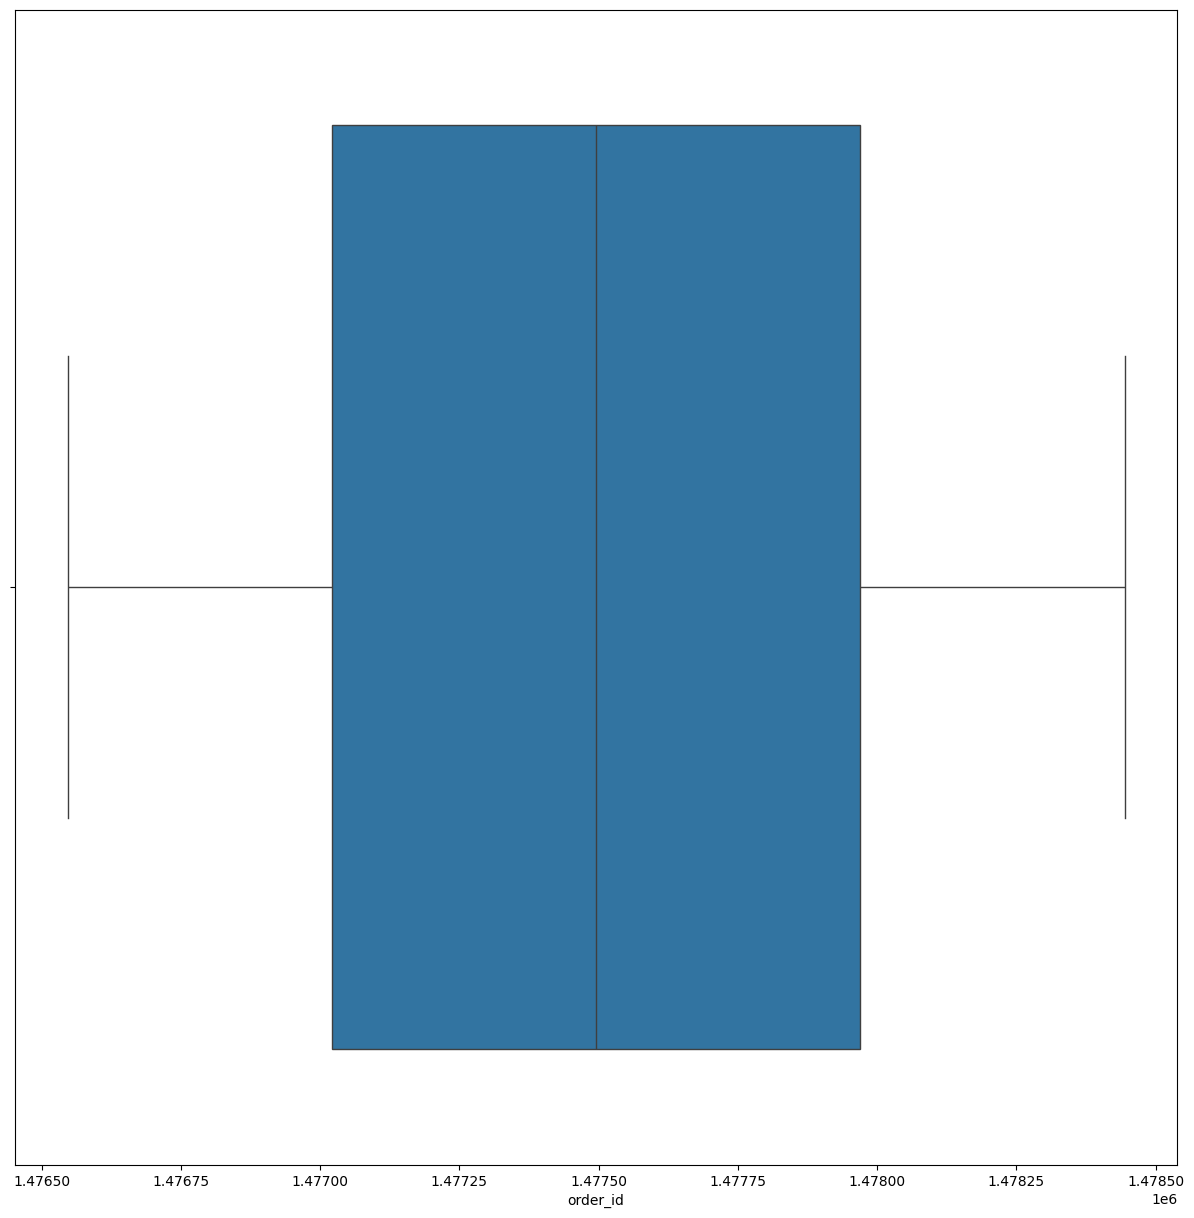

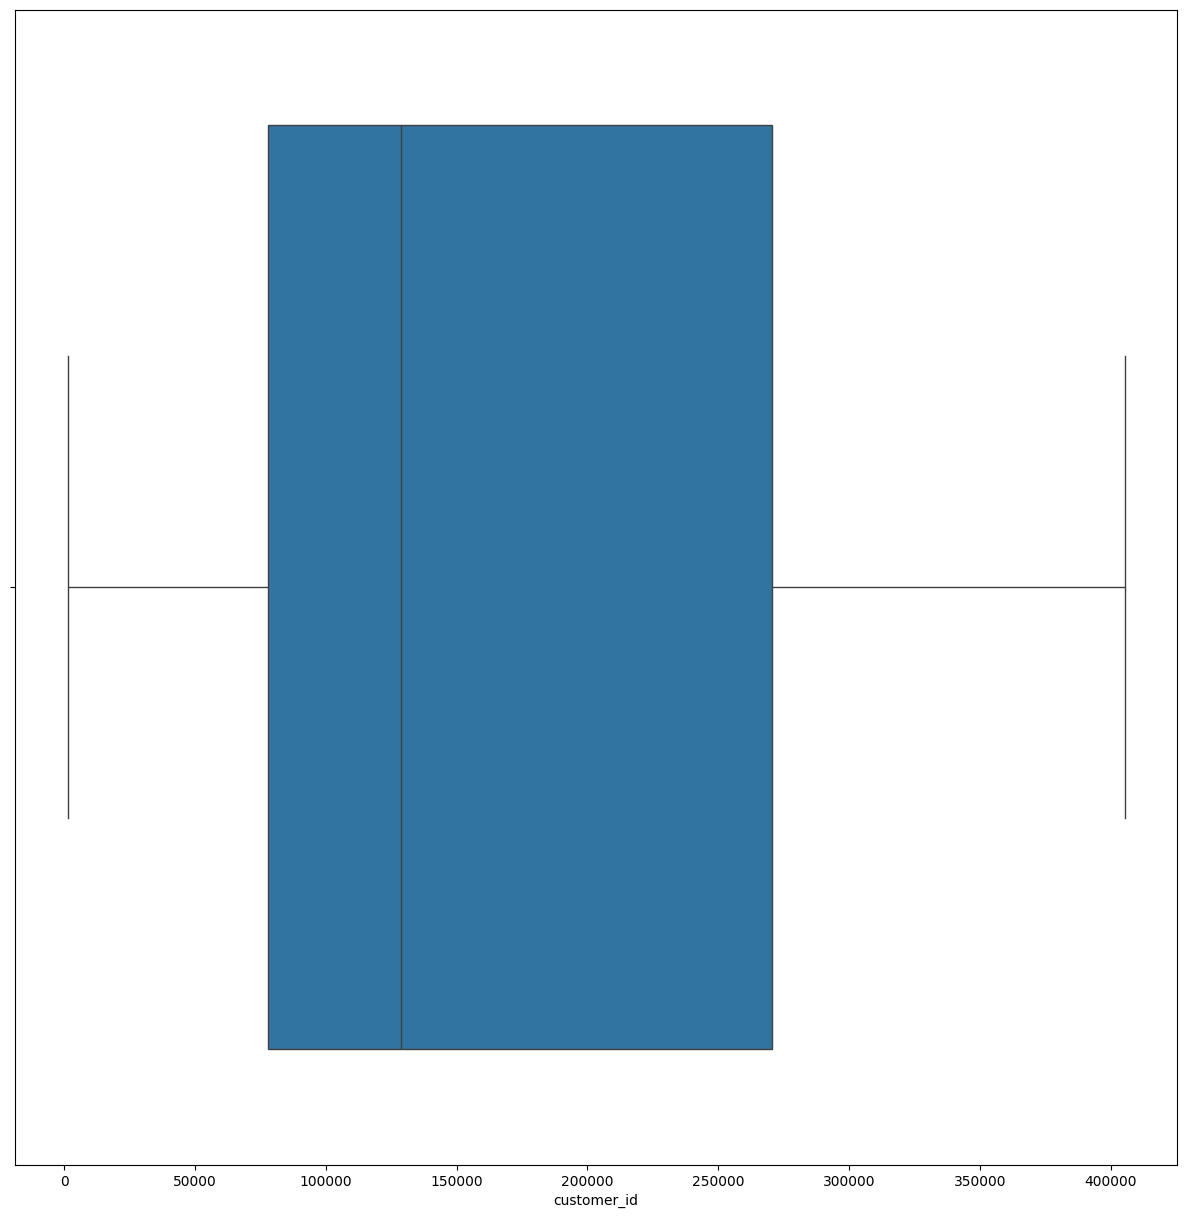

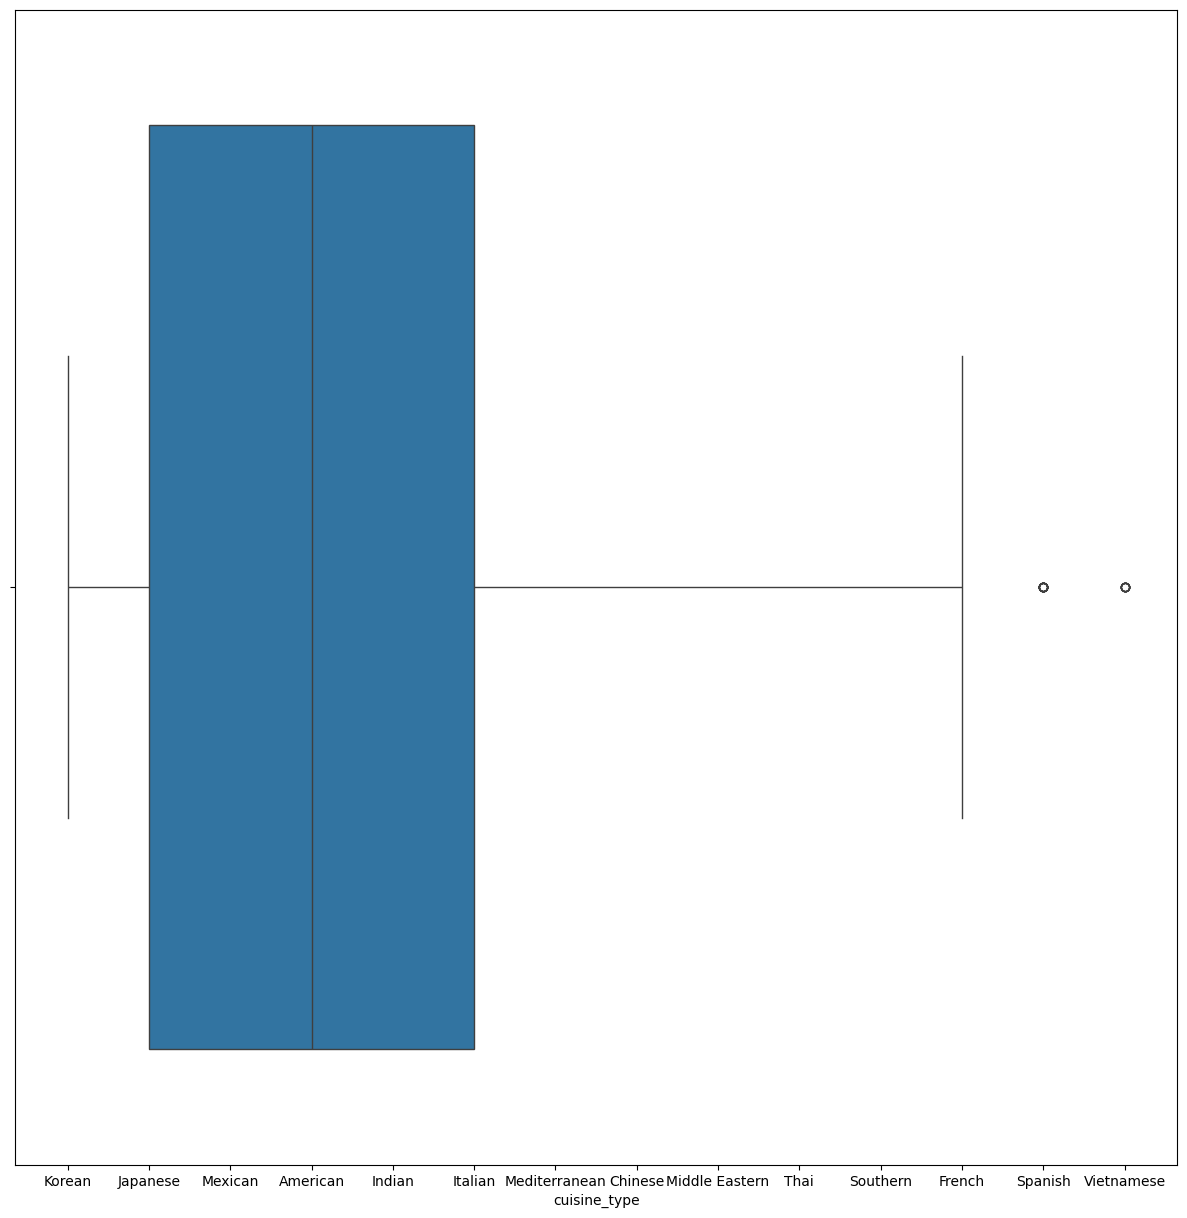

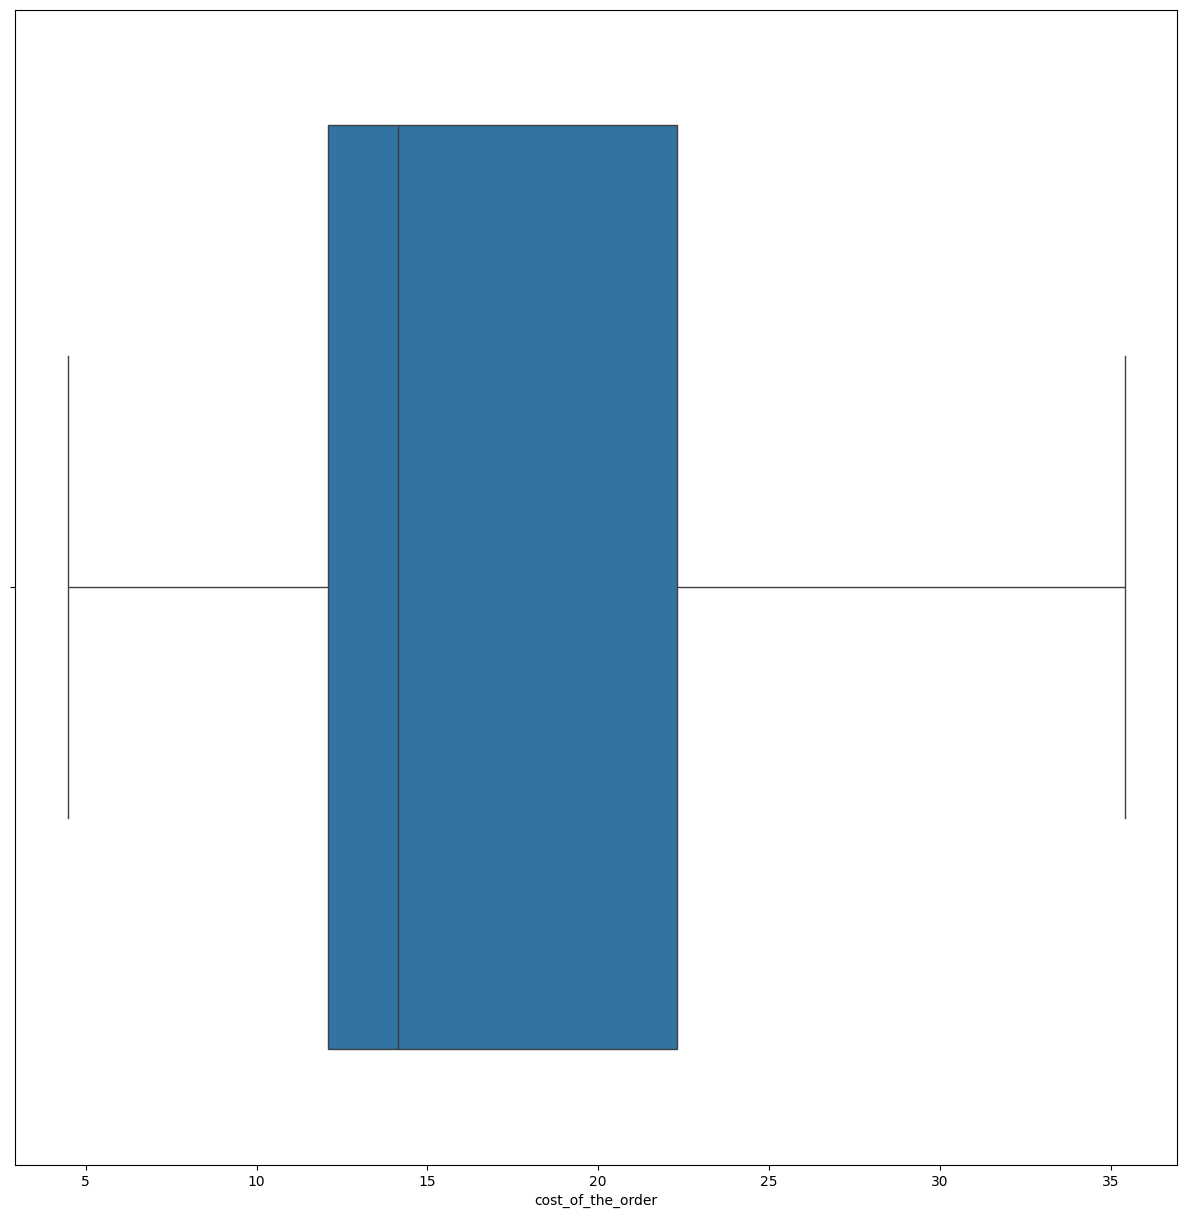

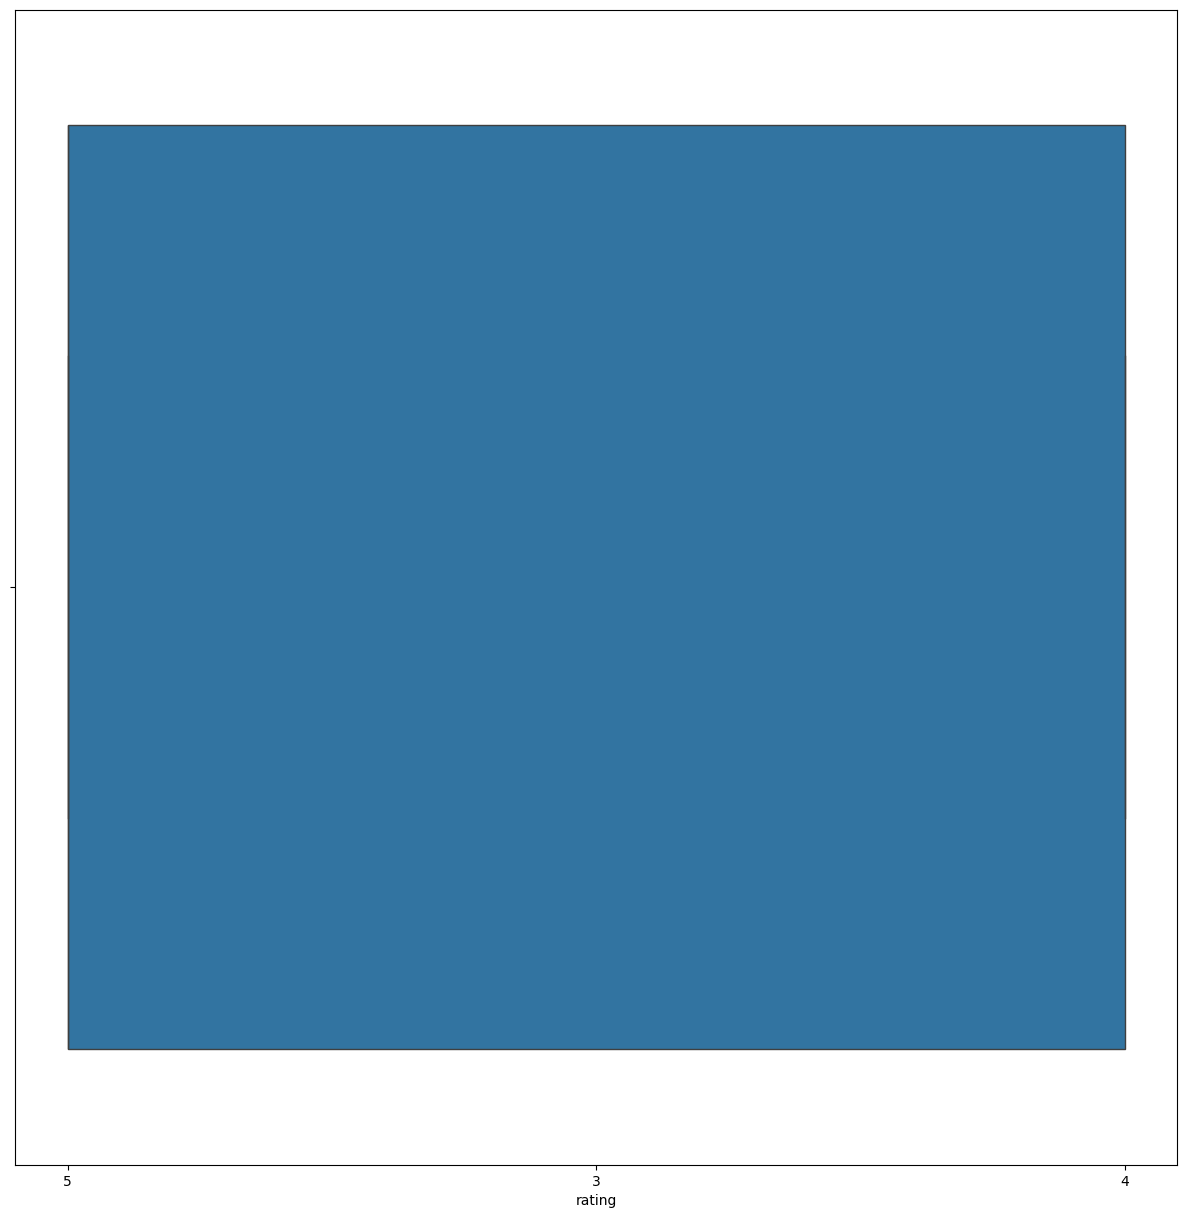

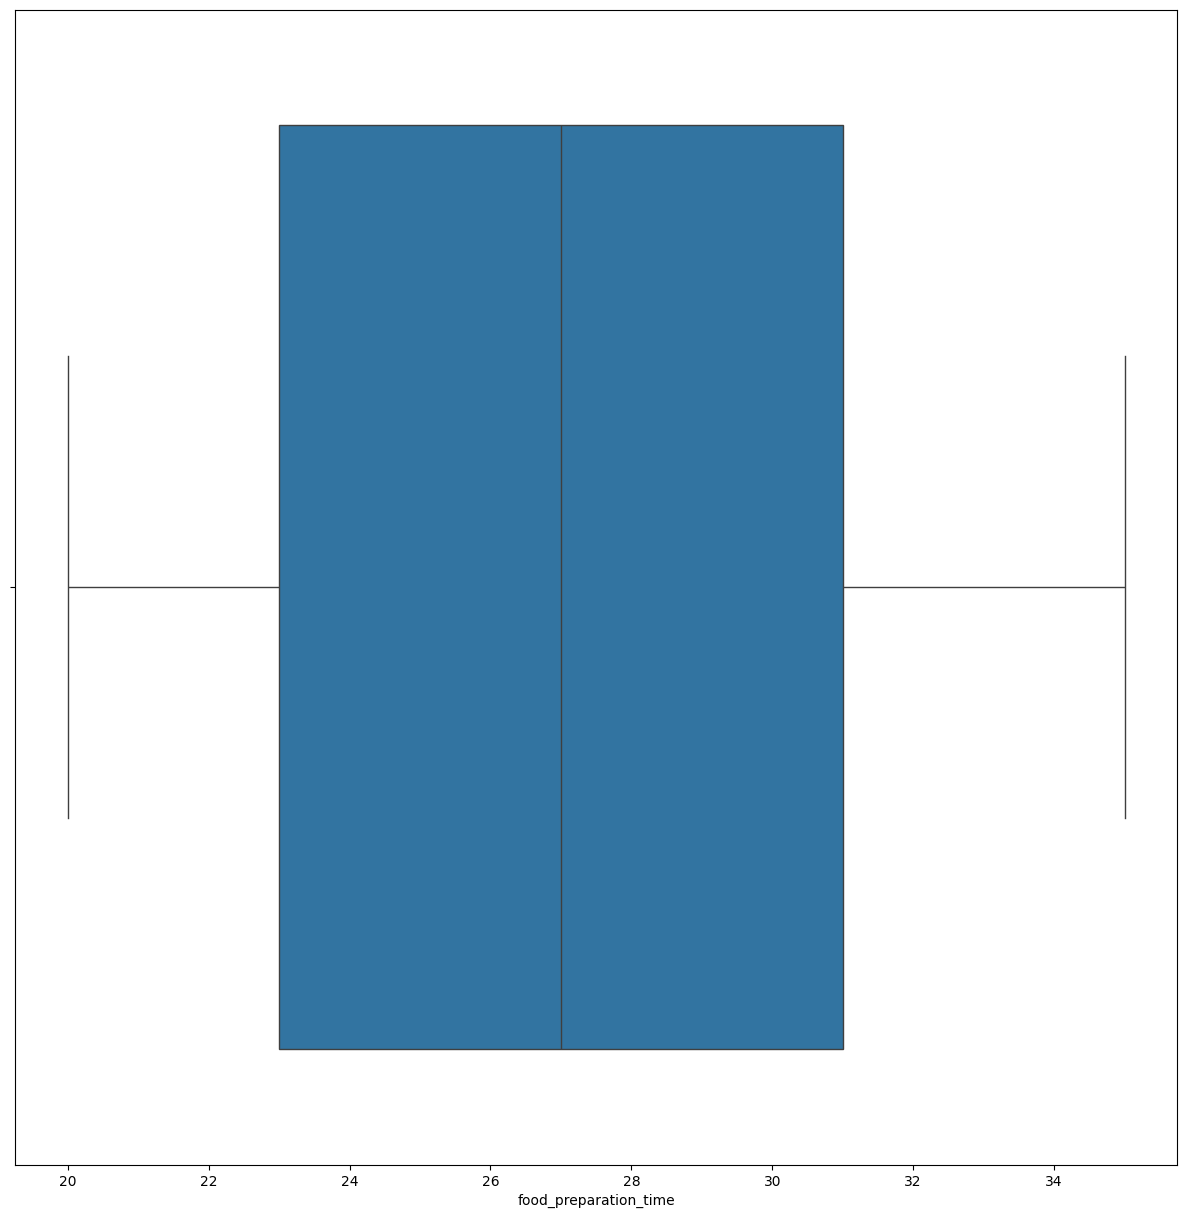

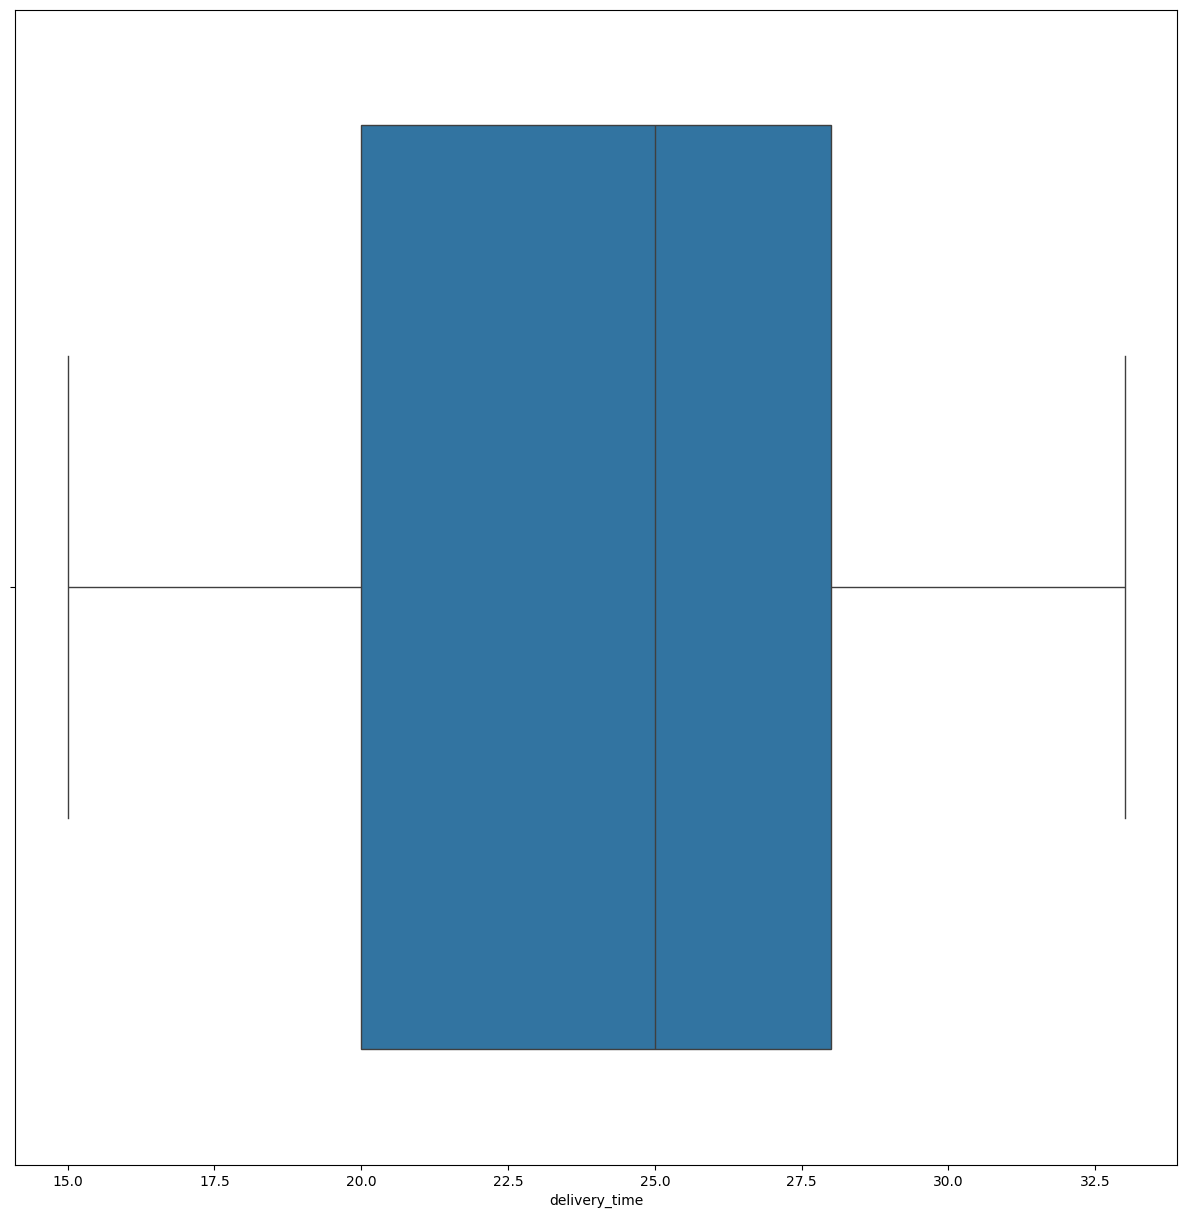

In [ ]:
# iterates through the column of the df, skips 2 columns, creates box plot for current column
for col_name, col in df.items() :
    if col_name not in ('restaurant_name', "day_of_the_week" ):
      plt.figure(figsize=(15, 15))
      sns.boxplot(data=df, x=col)
      plt.show()

Observations: The total distribution of total_time is positively skewed. The median total time is around 40 minutes. Only a few outliers greater than 100 minutes. The delivery time is also positivly skewed with a median delivery time of around 20 minutes.The food preperation time is less skewed than the oters two distributions with a median food preperation time of 15 minutes. Overall the the data shows that a majority of the orders are delivered with a reasonable amount of time with only a few outliers of longer delivery times.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Counts the number of orders and returns the top 5 along with restaurant names
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Locates in the df the day of the week column equal to Weekend, counts the cuisine type
df.loc[df['day_of_the_week'] == 'Weekend', 'cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:American cruisine is most popular on the weekends at 415

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# calculates the number of orders where the cost is more than $20
num_orders_more_20 = df[df['cost_of_the_order'] > 20].shape[0]
# num_orders_more_20 equal 555
# assigns variable and shapes the df, divides the two variables and multiplys by 100 then rounds
total_orders = df.shape[0] # total_orders 1898
round((num_orders_more_20 / total_orders) * 100)



29

#### Observations:The percentage of the orders that cost more than $20 is 29%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# This code rounds the mean of order delivery time
round(df['delivery_time'].mean())

24

#### Observations: The mean of the order delivery time is 24


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# counts and displays the top 3 customer ids and slices how may orders they placed
df['customer_id'].value_counts()[0:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The top 3 customers are: 52832 with 13 orders, 47440 with 10 orders, 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# displays info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


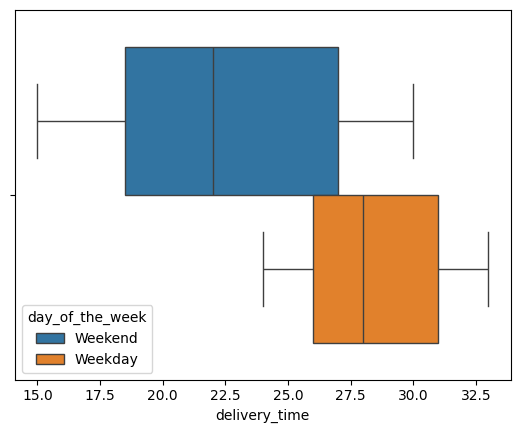

In [ ]:
# creates 2 seaborn box plot from the data frame on delivery time as x and color as day of the week
sns.boxplot(data = df, x = 'delivery_time', hue = 'day_of_the_week');

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

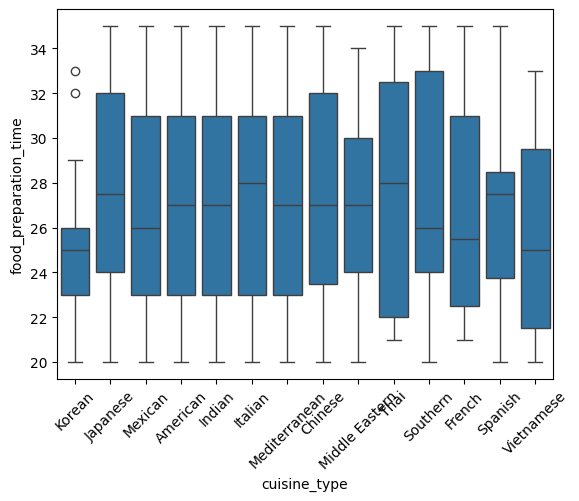

In [ ]:
# creates multiple seaborn boxplot on two columns, then rotates the x labels 45 degree
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time');
plt.xticks(rotation = 45)

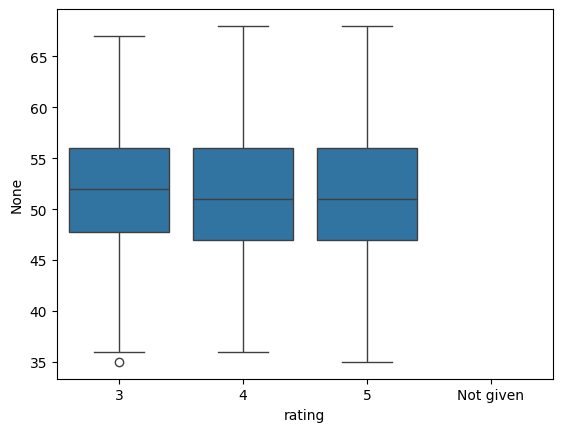

In [ ]:
#
sns.boxplot(data = df, x = 'rating', y = df["food_preparation_time"] + df['delivery_time'], order = ['3', '4', '5', 'Not given']);

#### Observations:The histogran distribution cost of the order is positively skewed, there are more orders worth lower costs tha orders with higher costs. The most common is between 10 and 20 dollars. overall id say most orders are profitable but are small purchaces.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# group restaruant by ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
rest_group = df.groupby('restaurant_name')["rating"].agg(num_ratings="count", avg_ratings="mean")
rest_group.loc[(rest_group["num_ratings"] > 50) & (rest_group['avg_ratings'] > 4)]

,num_ratings,avg_ratings
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:There are 4 companies that meet the fulfill the criteria to get the promotional offer. Shake Shake has the highest number of ratings and The Meatball Shop has the highest average ratings.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Orders greater than 20 25% off, orders greater than 5 not bigger than 20 15% off, sum, multiplied, returns net value as a float
over20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * .25
over5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum()* .15
net_revenue = over20 + over5
print(f"net revenue is: {net_revenue:.2f}")

net revenue is: 6166.30


#### Observations: The net revenue generated across all orders for the company is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Adds delivery and food prep time together as variable total time then find times over 60 min, shapes and multiples by 100 to get 10.53%
df['total_time'] = df['delivery_time'] + df['food_preparation_time']
rounded_results = round((df[df['total_time'] > 60].shape[0] / df.shape[0] *100), 2)
rounded_results

10.54

#### Observations: 10.537407797681771% or rounded to 10.54% of orders take over the 60 min timeframe



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Number of total orders effects the average time of the orders with a negative corrilation
daysofweek = df.groupby('day_of_the_week')['delivery_time'].agg(avgtime="mean", totalorders="count")
daysofweek["avgtime"].corr(daysofweek["totalorders"])

-1.0

In [ ]:
# groups by day of the week and delivery time and provides the 2 different averages/means then finds the variance between the two, rounds and returns 2 places frmo decimal
weekday_mean, weekend_mean = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_variance = np.var([weekday_mean, weekend_mean])
mean_variance
rounded_variance = round((mean_variance), 2)
rounded_variance


8.61

#### Observations: The variance between the weekdays and weekends mean delivery time is 8.61426713872057 or rounded to 8.61. As orders decrease delivery time increases suggestion a negative corrilation. If we ha the average employees on both weekends and weekdays we could find out if they are working harder on weekends to meet the orders or if they are slacking slow on weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
**Long delivery times** Make sure data outliers on such as delivery time are not from bad weather etc. There a significant amount of long delivery time out outliers that could show some clear problems to fix.
**Low feedback ratings** The data shows there are quite a bit of negative reviews left by many customers.
**Cruise type** Data shows that the most popular cruise types are American, Italian, and Chinese food.
**Average order** The average orders are low.
**Repeat customers** Repeat customers are relatively low.


### Recommendations: By addressing these issues we can improve customer satisfaction,increase sales to improve the bottom line.

**Improve Delivery times** Optimize delivery routes, hire more drivers, offer incentives to customer who are willing to accept longer delivery times.
**Address customer feedback** Respond to negative feedback to address customer concerns, make changes to improve the customer experience and offer apologies and/orcompensation to customers who have had negative experiences.
**Promote popular cruise types** Offer a wider variety of dishes in the most popular cuisine types and or run promotions and discounts on popular dishes
**Target frequent customers** offer loyalty programs or discounts to customers who order more frequently. Could also send personalized emails or offes to these customers.
**Increase average order** Offer bundle deals, upsell more expensive items, run discounts on more expensive items, free delivery over a centain amount.

---